In [77]:
import pandas as pd
df = pd.read_excel(f'./[태블로] 침수관련_데이터_정규화.xlsx')
#자치구 원핫 인코딩 진행
ohe = pd.get_dummies(df[['자치구']])
#데이터에 년도별, 월별, 일별 데이터를 추가하고 기계가 학습할 수 있도록 float로 형변환
df['Year'], df['Month'], df['Day'] = df['날짜'].str.split('-').str
for i in ['Year', 'Month','Day']:
  df[i] = list(map(float, df[i]))

,자치구,날짜,1hr 강수량,일평균 강수량,경사,고도,불투수면,녹지,하천,복개하천,맨홀,빗물받이,빗물펌프,교통사고,피해
0,종로구,2018-06-01,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.166667,0
1,종로구,2018-06-02,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.166667,0
2,종로구,2018-06-03,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.125000,0
3,종로구,2018-06-04,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.083333,0
4,종로구,2018-06-05,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.333333,0


<ipython-input-24-677c12a6fb34>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Years = df.groupby('Year').mean()
<ipython-input-24-677c12a6fb34>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Years = df.groupby('Month').mean()
<ipython-input-24-677c12a6fb34>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Years = df.groupby('Day').mean()


<Axes: xlabel='Day'>

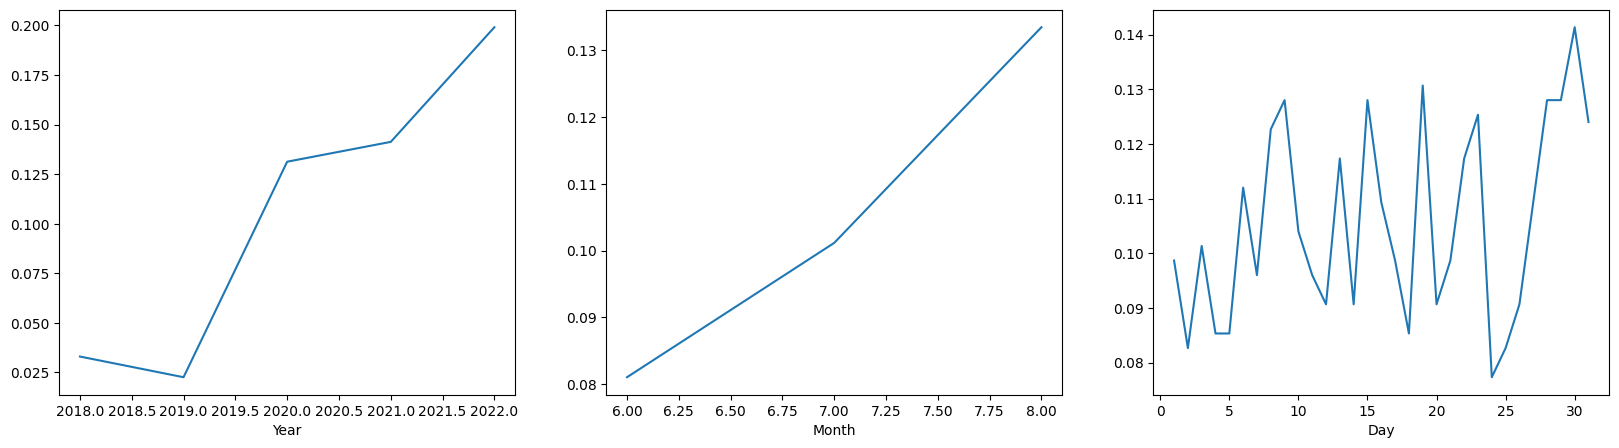

In [24]:
#22년도 또는 8월에 침수 피해 가장 컸음, 날씨 데이터 포함 필요
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(131)
Years = df.groupby('Year').mean()
Years['피해'].plot(x = df.Year)
plt.subplot(132)
Years = df.groupby('Month').mean()
Years['피해'].plot(x = df.Month)
plt.subplot(133)
Years = df.groupby('Day').mean()
Years['피해'].plot(x = df.Day)

In [86]:
from sklearn.model_selection import train_test_split
import numpy as np
df = pd.read_excel(f'./MC_230814.xlsx')
#기존 데이터와 합치고 훈련데이터 등 분리
X = df.iloc[:,0:115]
y = df.iloc[:,115]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu', name = 'Dense_1'))
model.add(Dense(8, activation= 'relu', name = 'Dense_2'))
model.add(Dense(1, activation = 'sigmoid', name = 'Dense_3'))
model.summary()

model.compile(optimizer='adam', loss = 'mean_squared_error')

#자꾸 에러가..

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =11)

dt_clf = DecisionTreeClassifier(random_state = 11)

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9330


In [96]:
#교차 검증 k fold 진행
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
cv_accuracy = []

n_iter = 0
for train_index, test_index in kfold.split(X):
  X_train,X_test,y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.3)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)

  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('{0} 교차 검증 정확도 {1}, 학습 데이터 크기{2}, 테스트 데이터 크기{3}'.format(n_iter,accuracy, train_size, test_size))
  print('{0} 교차 검증 세트 인덱스{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)
print('평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
1 교차 검증 세트 인덱스[   0    1    2 ... 2297 2298 2299]
2 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
2 교차 검증 세트 인덱스[2300 2301 2302 ... 4597 4598 4599]
3 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
3 교차 검증 세트 인덱스[4600 4601 4602 ... 6897 6898 6899]
4 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
4 교차 검증 세트 인덱스[6900 6901 6902 ... 9197 9198 9199]
5 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
5 교차 검증 세트 인덱스[ 9200  9201  9202 ... 11497 11498 11499]
평균 검증 정확도: 0.9286999999999999


In [98]:
#Stratified K Fold

#stratifiedKFold - 5개로 나누지만 분포를 잘 설정해서 진행
import numpy as np
from sklearn.model_selection import StratifiedKFold
#교차 검증하기
skfold = StratifiedKFold(n_splits = 3)
cv_accuracy = []

n_iter = 0
for train_index, test_index in skfold.split(X, y):
  X_train,X_test,y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.3)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)

  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('{0} 교차 검증 정확도 {1}, 학습 데이터 크기{2}, 테스트 데이터 크기{3}'.format(n_iter,accuracy, train_size, test_size))
  print('{0} 교차 검증 세트 인덱스{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)



print('평균 검증 정확도:', np.mean(cv_accuracy))

1 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
1 교차 검증 세트 인덱스[   0    1    2 ... 6690 6691 6692]
2 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
2 교차 검증 세트 인덱스[3524 3525 3526 ... 9594 9596 9597]
3 교차 검증 정확도 0.9287, 학습 데이터 크기8050, 테스트 데이터 크기3450
3 교차 검증 세트 인덱스[ 7402  7403  7404 ... 11497 11498 11499]
평균 검증 정확도: 0.9287


In [100]:
#cross_validation_score
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(dt_clf, X, y, scoring = 'accuracy', cv = 3)
print('교차 검증 정확도:', np.round(scores, 4))
print('평균 검증 정확도',np.round(np.mean(scores),4))

교차 검증 정확도: [0.897  0.2351 0.2126]
평균 검증 정확도 0.4482


In [101]:
from sklearn.model_selection import GridSearchCV
#parameter 정하는 GridSearchCV
dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dtree = GridSearchCV (dtree, param_grid = parameters, cv = 3, refit = True)
grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.896522,5,0.894933,0.897130,0.897503
1,"{'max_depth': 1, 'min_samples_split': 3}",0.896522,5,0.894933,0.897130,0.897503
2,"{'max_depth': 2, 'min_samples_split': 2}",0.901491,3,0.898286,0.903466,0.902721
3,"{'max_depth': 2, 'min_samples_split': 3}",0.901491,3,0.898286,0.903466,0.902721
4,"{'max_depth': 3, 'min_samples_split': 2}",0.905714,1,0.909463,0.902721,0.904957
5,"{'max_depth': 3, 'min_samples_split': 3}",0.905714,1,0.909463,0.902721,0.904957


In [105]:
print('grid_dtree.best_params_',grid_dtree.best_params_)
print('grid_dtree.best_score_',grid_dtree.best_score_)
pred = grid_dtree.predict(X_test)
print(accuracy_score(y_test, pred))

estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('정확도:', accuracy_score(y_test, pred))

grid_dtree.best_params_ {'max_depth': 3, 'min_samples_split': 2}
grid_dtree.best_score_ 0.9057138199170912
0.8997101449275362
정확도: 0.8997101449275362


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리:',accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤 포레스트:', accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀:',accuracy_score(y_test, lr_pred))

결정트리: 0.928695652173913
랜덤 포레스트: 0.9423188405797102
로지스틱 회귀: 0.8953623188405797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
#stratifiedKFold - 5개로 나누지만 분포를 잘 설정해서 진행
import numpy as np
from sklearn.model_selection import StratifiedKFold

#교차 검증하기

skfold = StratifiedKFold(n_splits = 3)
cv_accuracy = []
def exec_kfold(clf, folds = 5):
  kfold = KFold(n_splits = folds)
  scores = []
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train,X_test,y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.3)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,predictions),4)
    scores.append(accuracy)
    print('{0} 교차 검증 정확도 {1}'.format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(np.mean(mean_score)))
exec_kfold(dt_clf, folds = 5)


0 교차 검증 정확도 0.9287
1 교차 검증 정확도 0.9287
2 교차 검증 정확도 0.9287
3 교차 검증 정확도 0.9287
4 교차 검증 정확도 0.9287
평균 정확도: 0.9287


In [113]:
scores = cross_val_score(dt_clf, X, y, cv = 5)
scores
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 {1}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 0.8926086956521739
교차 검증 1 정확도 0.668695652173913
교차 검증 2 정확도 0.42043478260869566
교차 검증 3 정확도 0.2852173913043478
교차 검증 4 정확도 0.1882608695652174
평균 정확도: 0.4910


In [114]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, cv = 5, scoring = 'accuracy')
grid_dclf.fit(X_train, y_train)
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
print(accuracy)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9281987577639752
0.9342028985507247


In [116]:
#정밀도와 재현율
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['피해'].iloc[i] == 1:
        pred[i] == 0
      else:
        pred[i] == 1
    return pred
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('dummy clf 의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

KeyError: ignored

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision= precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬',confusion)
  print('정확도 {}, 정밀도{}, 재현율{}'.format(accuracy, precision, recall))

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function __main__.get_clf_eval(y_test, pred)>

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision= precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬',confusion)
  print('정확도 {0:.4f}, 정밀도{1:.4f}, 재현율{2:.4f}, f1: {3:.4f}, auc: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [119]:
import matplotlib.pyplot as plt
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label= 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall Value')
  plt.legend();plt.grid()
  plt.show()


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)



오차행렬 [[3070   12]
 [ 349   19]]
정확도 0.8954, 정밀도0.6129, 재현율0.0516, f1: 0.0952, auc: 0.8178


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


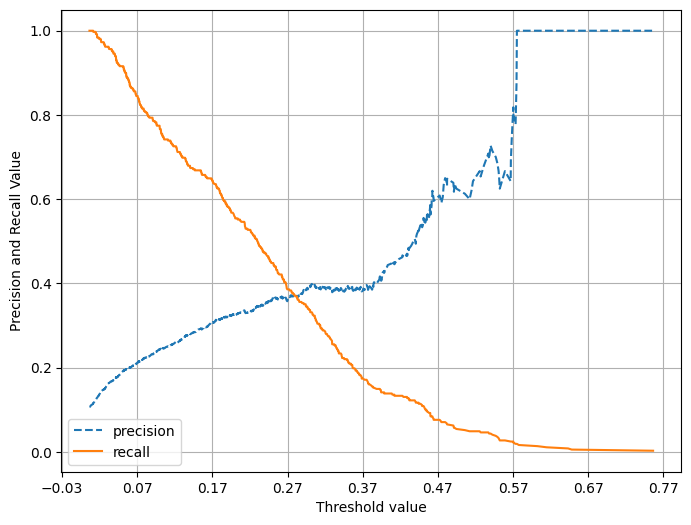

In [120]:
#0.28정도로 맞추면 균형을 이룰 것으로 보임
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

(array([1.03e+04, 7.12e+02, 3.32e+02, 1.01e+02, 2.90e+01, 1.20e+01,
        6.00e+00, 2.00e+00, 4.00e+00, 2.00e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

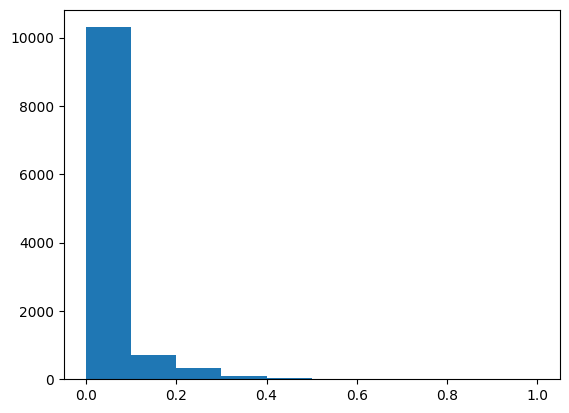

In [121]:
plt.hist(df['1hr 강수량'], bins = 10)

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

(prediction ==y_test).mean

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<bound method NDFrame._add_numeric_operations.<locals>.mean of 6243      True
3208      True
8993      True
2380      True
7350     False
         ...  
3930      True
5767      True
3135      True
827       True
11239     True
Name: 피해, Length: 2300, dtype: bool>

In [91]:
#확률적 경사 하강법
from IPython.display import Image
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
prediction =sgd.predict(X_test)
(prediction ==y_test).mean()

0.8908695652173914

In [122]:
#최근접 이웃 알고리즘 KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
(knc_pred == y_test).mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 4138     True
8454     True
8806     True
110      True
1357     True
         ... 
2072     True
7208     True
5195     True
11417    True
9057     True
Name: 피해, Length: 3450, dtype: bool>

In [123]:
#SVC 서포트 벡터 머신
from sklearn.svm import SVC
svc = SVC(random_state = 0,)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
(svc_pred == y_test).mean()

0.8933333333333333

In [124]:
#Decision Tree Classifier 의사결정 트리
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
(dtc_pred == y_test).mean()

0.9269565217391305

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[3070,   12],
       [ 349,   19]])

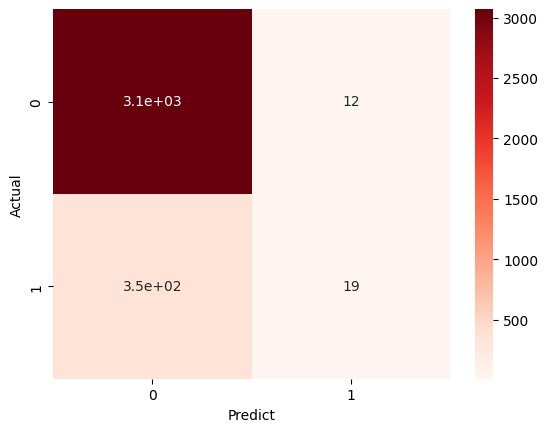

In [126]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred), annot= True, cmap = 'Reds',)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [127]:
precision_score(y_test, pred)

0.6129032258064516

In [128]:
recall_score(y_test, pred)

0.051630434782608696

In [129]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.09523809523809525